# **Dimensionality Reduction**

## **Project Proposal**


### **Introduction**
In this part of the project, I aim to explore the application of various dimensionality reduction techniques on my joint SEC-FDA mixed-financial/medical device approval data. The primary objective is to reduce the number of variables while retaining the essential information of continuous quantiative features to get a better intuitive sense of the feature space. This process is crucial for improving my models' interpretability and enhancing computational efficiency.

#### Objectives
1. **Data Understanding and Preprocessing**: I will further refine my understanding of dataset's characteristics, including its size, type of variables, and the presence of missing values. In the preprocessing steps, I will conduct data cleaning, normalization, and handling of missing values.
2. **Application of Dimensionality Reduction Techniques**: I will apply Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) using the Scikit-learn library. I will also evaluate the performance of these techniques and select the most suitable one.
3. **Visualization and Interpretation**: I will visualize the results of dimensionality reduction for better understanding and to interpret the patterns and relationships in the reduced dimensions.

#### Expected Outcomes
I expect that my use of PCA and t-SNE will yield a reduced-dimensional dataset that maintains the critical information, insights into the effectiveness of different dimensionality reduction techniques, and visual representations of the high-dimensional data in a lower-dimensional space to better help me understand the shape of my feature space.

#### Significance
This portion of analysis is important to my overall project and is significant as it will provide a comprehensive understanding of the dataset and its characteristics. It will also help me to better understand the shape of my feature space and the relationships between the features. This will be crucial for the next steps of my project, which will involve the application of decision trees and random forests to predict the categorial outcomes of a device submission (such as advisory_committee_description and clearance_type) of the FDA medical devices so that I can understand the relationship between financial structuring of a company and device approval outcomes.


## **Code Implementation**

### **Data preparation**

In [80]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [81]:
# Reading in the data
df = pd.read_csv('/mnt/data/imputed.csv')  #../data-cleaning/outputs/

# Quick look at the data
df

,device_name,SEC_name,state,CIK,financial_year,advisory_committee_description,clearance_type,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic,ConsolidatedRevenue
0,CONFIRM BIOACTIVE,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,1.108570e+08,3.635140e+08,2.324430e+08,3.168700e+07,1.877980e+08,1.383620e+08,9.248500e+07,0.980000,4.743710e+08
1,SILC FIXATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,1.108570e+08,3.635140e+08,2.324430e+08,3.168700e+07,1.877980e+08,1.383620e+08,9.248500e+07,0.980000,4.743710e+08
2,REVERE STABILIZATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,1.108570e+08,3.635140e+08,2.324430e+08,3.168700e+07,1.877980e+08,1.383620e+08,9.248500e+07,0.980000,4.743710e+08
3,SUSTAIN AND SUSTAIN RADIOLUCENT SPACERS,"GLOBUS MEDICAL, INC.",PA,1237831,2013.0,Orthopedic,Traditional,1.003430e+08,3.341160e+08,2.324430e+08,2.792600e+07,1.825180e+08,1.147930e+08,7.383100e+07,0.820000,4.344590e+08
4,COALITION SPACER,"GLOBUS MEDICAL, INC.",PA,1237831,2013.0,Orthopedic,Traditional,1.003430e+08,3.341160e+08,2.324430e+08,2.792600e+07,1.825180e+08,1.147930e+08,7.383100e+07,0.820000,4.344590e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,Palladium High Flow Therapy System,"Vapotherm, Inc.",NH,1253176,2019.0,Anesthesiology,Traditional,2.679300e+07,2.131100e+07,6.947500e+07,1.337600e+07,5.609900e+07,-4.816400e+07,-5.105900e+07,-7.598571,4.810400e+07
520,"Indigo System Aspiration Catheter 12, Indigo A...","Penumbra, Inc",CA,1321732,2020.0,Cardiovascular,Traditional,1.884480e+08,3.719640e+08,3.771170e+08,9.004900e+07,2.870680e+08,4.750800e+07,4.845800e+07,1.390000,5.604120e+08
521,BENCHMARK BMX81 Access System,"Penumbra, Inc",CA,1321732,2022.0,Cardiovascular,Traditional,3.119260e+08,5.352070e+08,5.291250e+08,7.940700e+07,4.497180e+08,-3.894200e+07,-2.463300e+07,-0.660000,8.471330e+08
522,Cerner CareAware Event Management,CERNER CORPORATION,MO,804753,2015.0,Cardiovascular,Traditional,7.507810e+08,3.674486e+09,2.893350e+09,5.627000e+08,1.183814e+09,7.811360e+08,5.393620e+08,1.570000,4.425267e+09


In [82]:
df.describe()

,CIK,financial_year,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic,ConsolidatedRevenue
count,5.240000e+02,524.000000,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,524.000000,5.240000e+02
mean,8.875991e+05,2016.129771,4.102409e+09,3.148158e+09,1.808084e+09,5.176914e+08,1.305361e+09,1.446103e+09,1.197573e+09,-0.599237,7.667055e+09
std,5.490020e+05,3.553787,1.773725e+10,1.139691e+10,3.988183e+09,1.806702e+09,2.383160e+09,7.944619e+09,6.712140e+09,14.409763,3.004724e+10
min,8.818000e+03,2009.000000,-1.200000e+07,-1.780200e+07,3.178000e+06,2.000000e+05,2.000000e+05,-9.062000e+08,-1.172800e+09,-248.220000,2.200000e+04
25%,3.432285e+05,2013.000000,5.053457e+07,8.604825e+07,9.513150e+07,2.263500e+07,7.462775e+07,-2.336600e+07,-2.934500e+07,-0.708571,1.694693e+08
50%,1.035267e+06,2016.000000,1.855980e+08,2.563735e+08,2.324430e+08,4.453200e+07,1.888823e+08,2.627400e+07,3.573514e+07,0.555000,4.012920e+08
75%,1.289850e+06,2019.000000,2.210000e+09,4.060970e+09,2.395109e+09,4.940000e+08,1.851774e+09,1.374500e+09,1.263271e+09,4.790000,7.708382e+09
max,1.833769e+06,2023.000000,2.235460e+11,1.707820e+11,5.134500e+10,2.625100e+10,2.509400e+10,1.194370e+11,9.980300e+10,19.210000,3.943280e+11


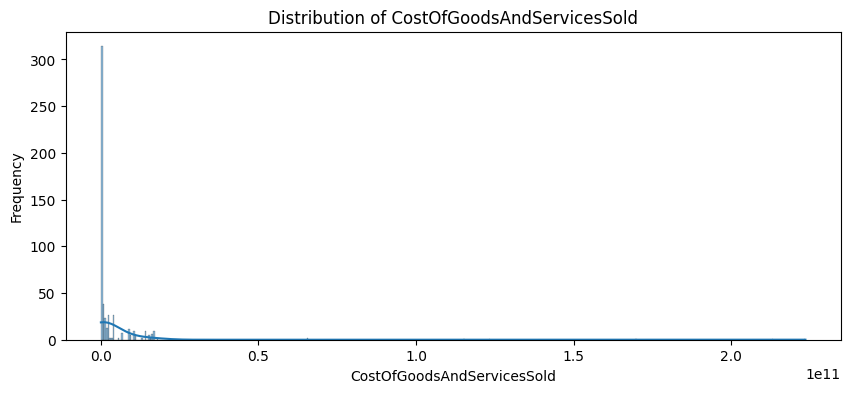

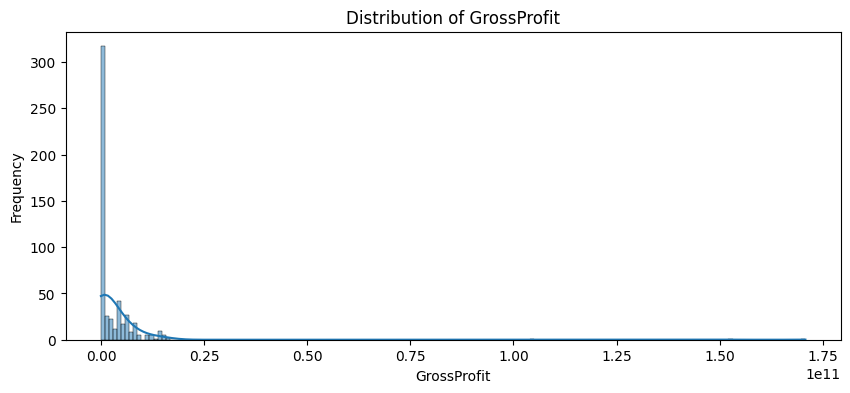

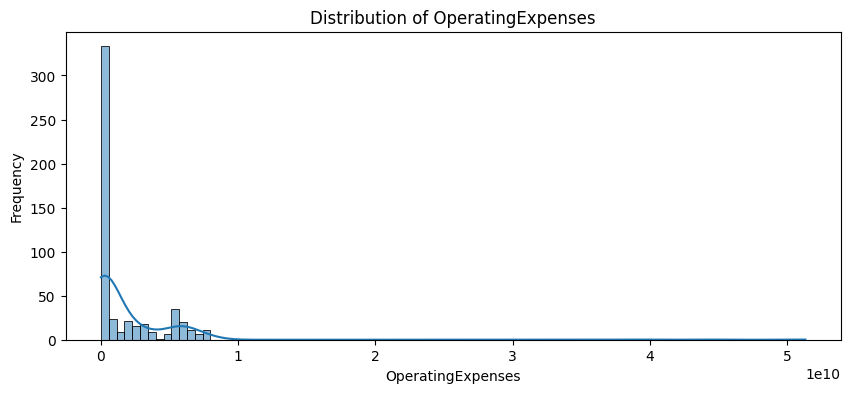

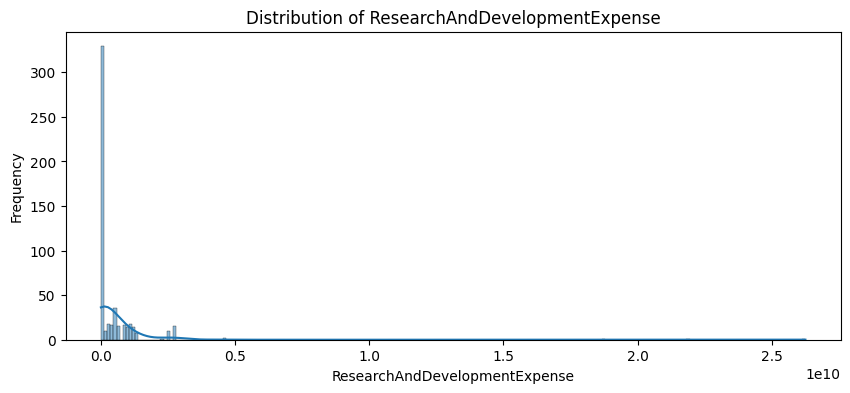

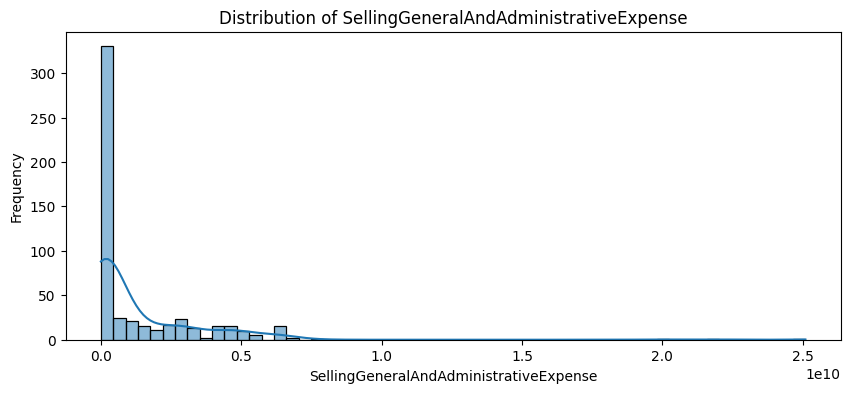

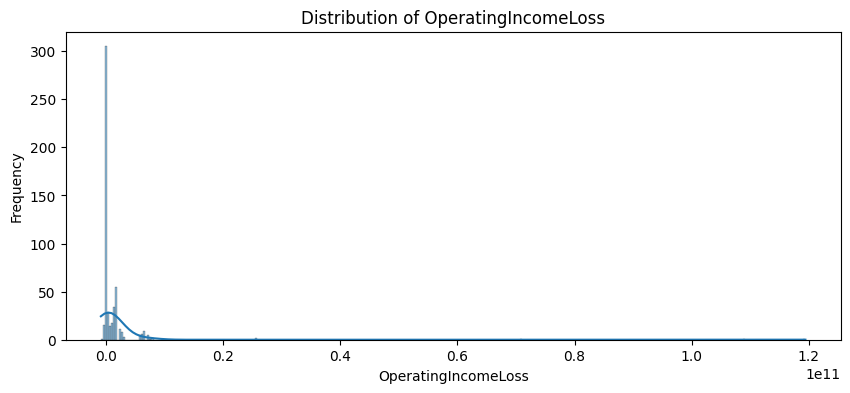

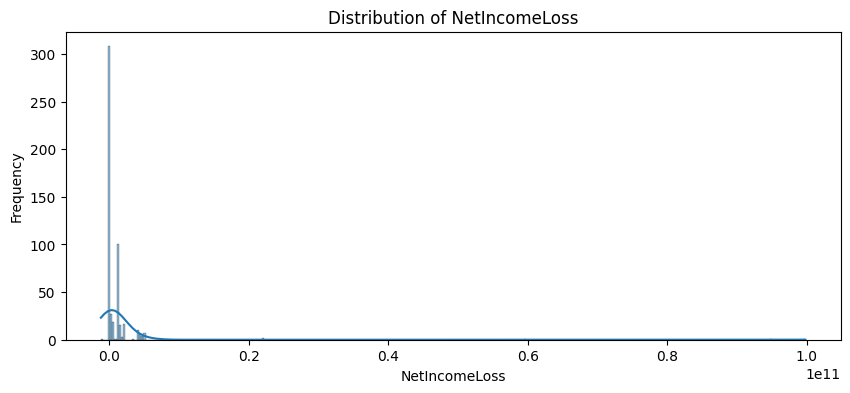

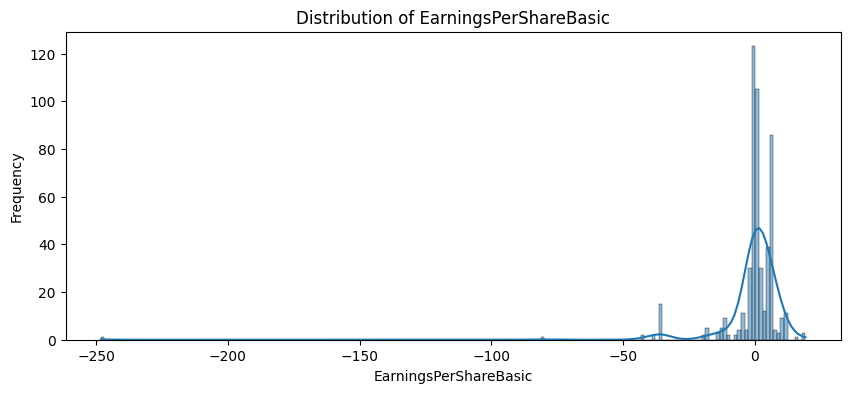

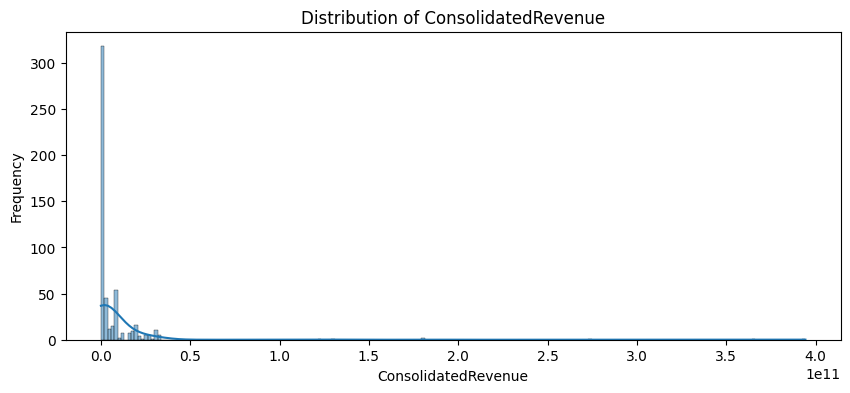

In [83]:
for col in df[df.columns[7:]]:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### **Log Normalization**

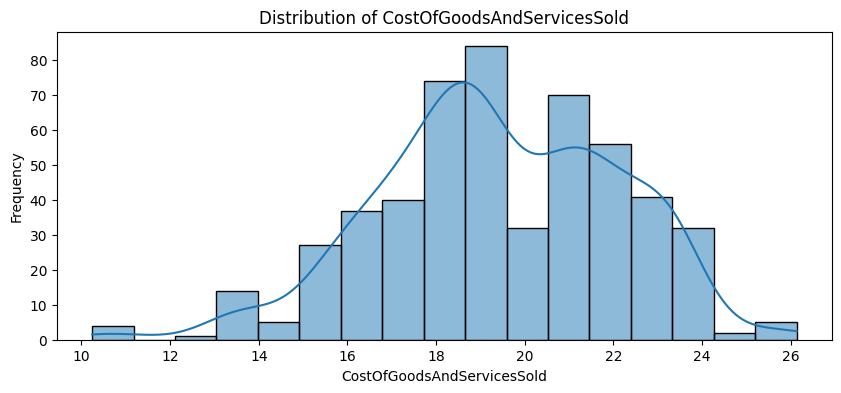

/Users/dsan/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


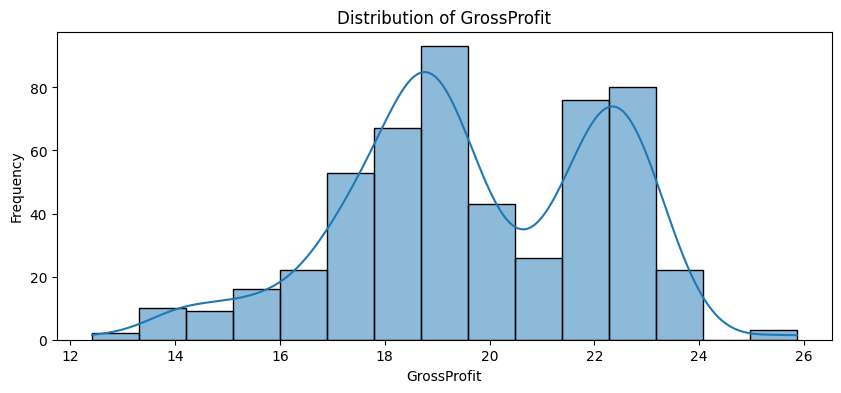

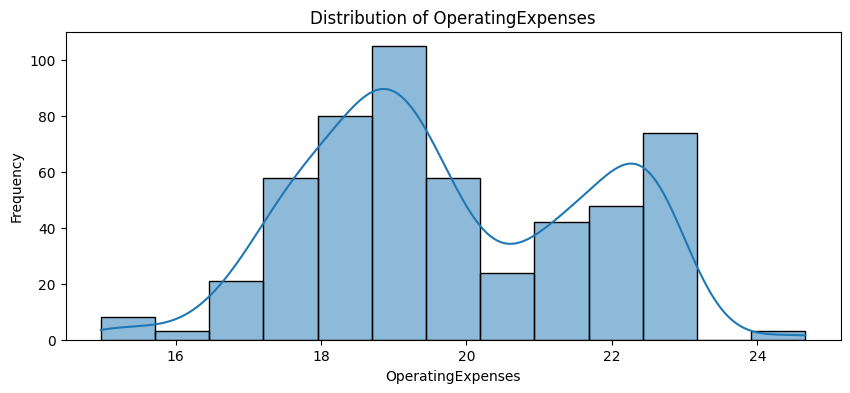

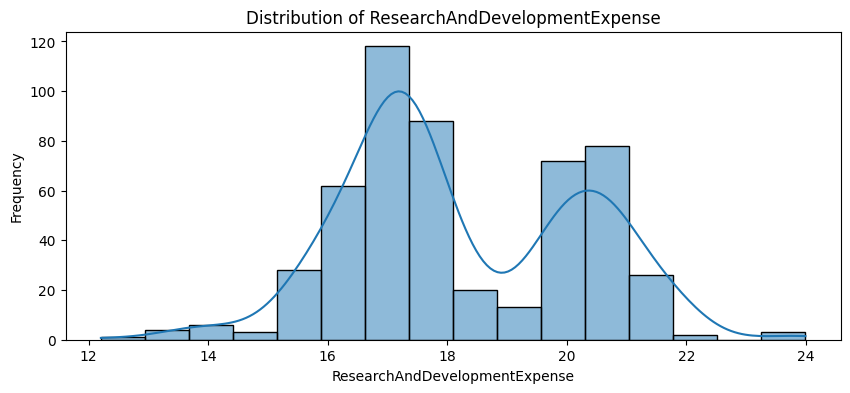

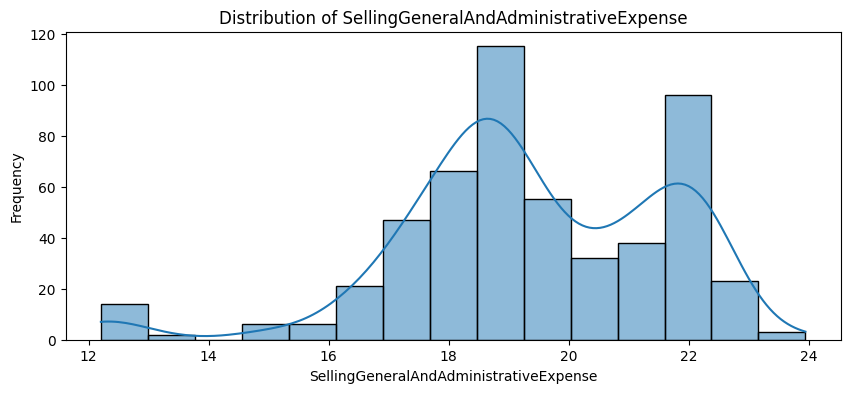

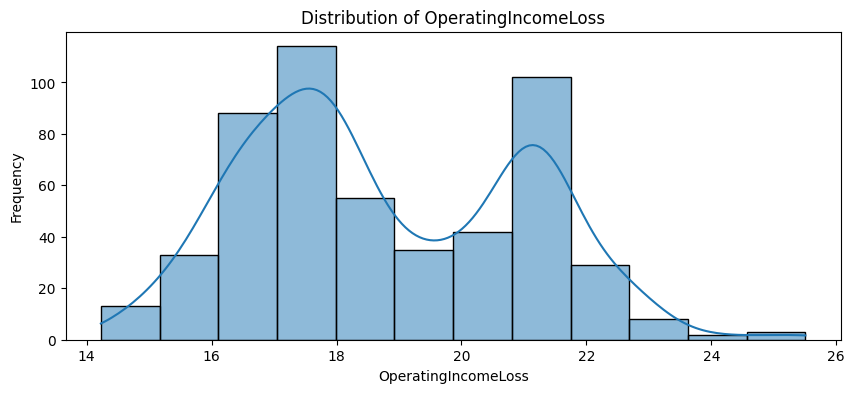

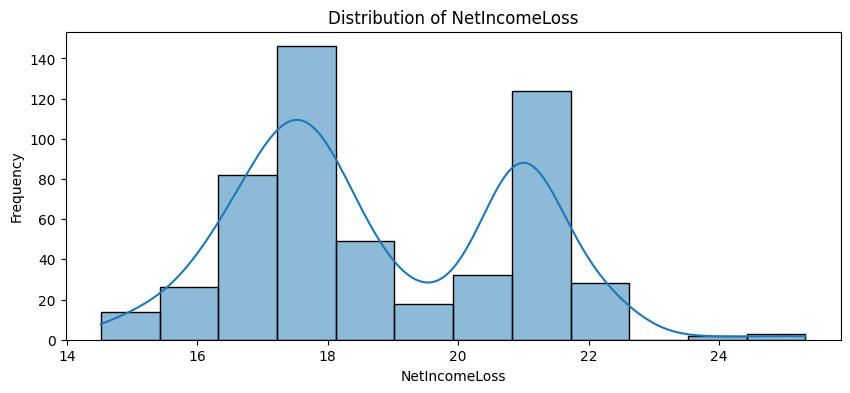

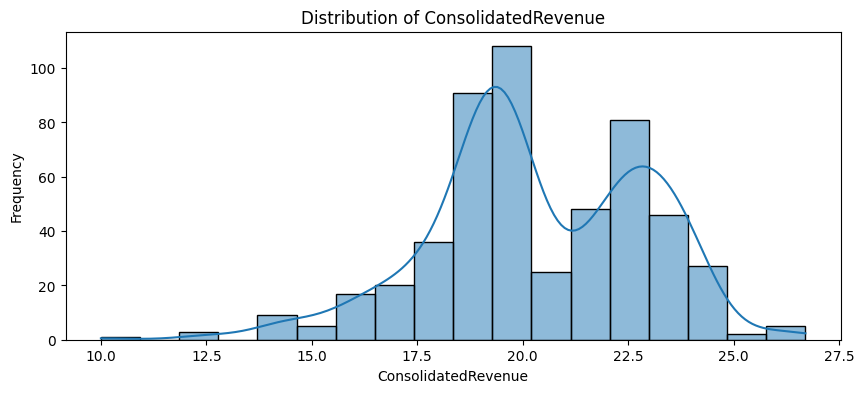

In [84]:
# Applying log scale 

log_features = ["CostOfGoodsAndServicesSold","GrossProfit", 
                "OperatingExpenses","ResearchAndDevelopmentExpense", 
                "SellingGeneralAndAdministrativeExpense","OperatingIncomeLoss",
                "NetIncomeLoss", "ConsolidatedRevenue"]

for col in df[log_features]:
    df[col] = np.abs(df[col])
    df[col] = np.log(df[col])
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

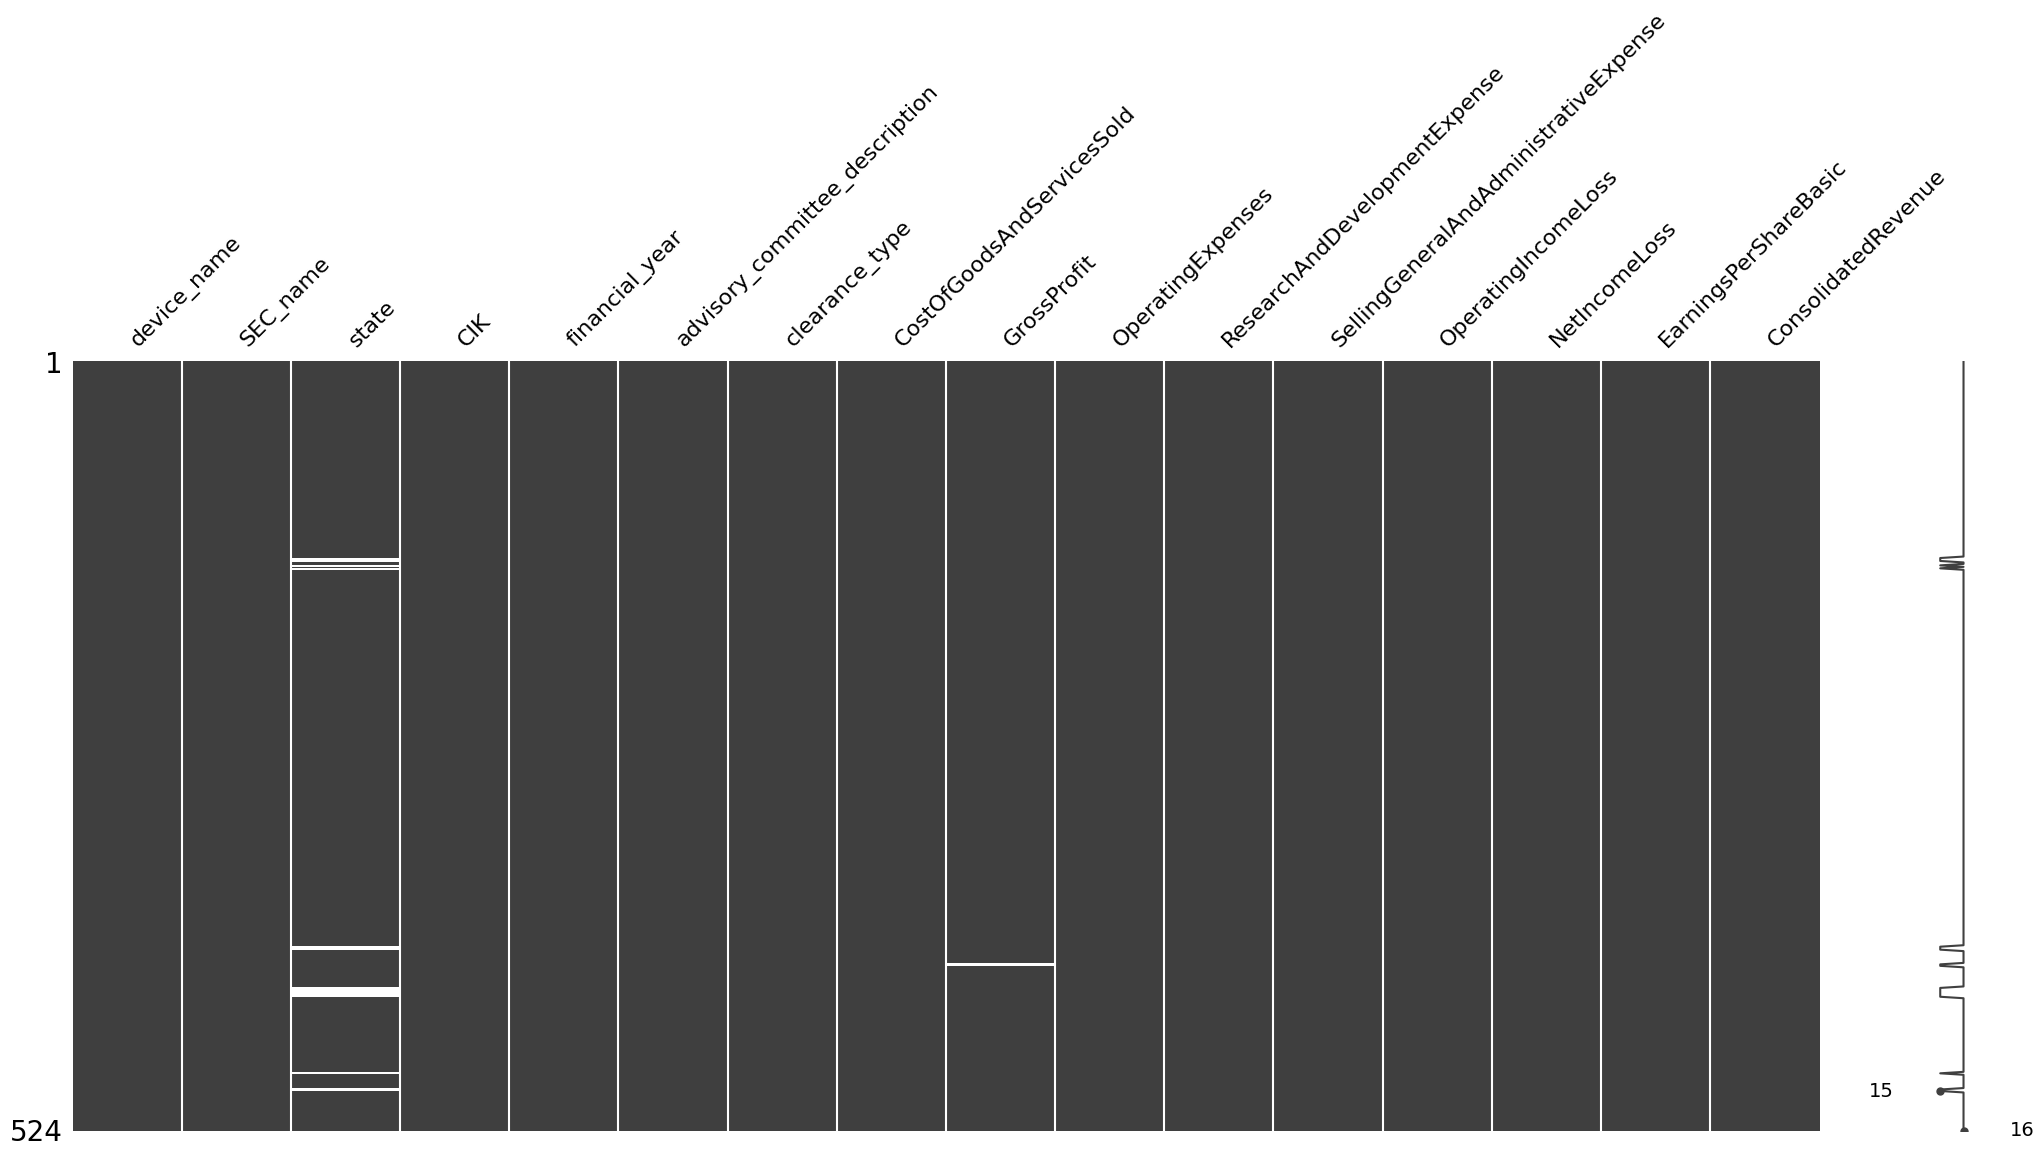

In [85]:
import missingno as msno

features = ['CostOfGoodsAndServicesSold',
                         'GrossProfit', 
                         'OperatingExpenses',
                         'ResearchAndDevelopmentExpense',
                         'SellingGeneralAndAdministrativeExpense', 
                         'OperatingIncomeLoss',
                         'NetIncomeLoss',
                         'EarningsPerShareBasic', 
                         'ConsolidatedRevenue']


df[features] = df[features].replace([np.inf, -np.inf], np.nan)

# Standardizing the feature space using sklearn's StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])        # returns a numpy array, so will convert to pandas dataframe for future convenience

# Quick View of the scaled features as a dataframe 
scaled_features_df = pd.DataFrame(scaled_features, columns=features)
scaled_features_df


df = df.drop(features, axis=1)
df = df.merge(scaled_features_df, left_index=True, right_index=True)
df.dropna(subset=['GrossProfit'])
msno.matrix(df)

df.to_csv('outputs/model.csv', index=False)

#### **Removing Outliers Beyond Z-score Threshold**

In [86]:
threshold = 3
no_outliers_df = scaled_features_df[(scaled_features_df.abs() < threshold).all(axis=1)]
no_outliers_df.reset_index(drop=True)

# merging to df
df[df.columns[:7]].merge(no_outliers_df, left_index=True, right_index=True).reset_index()

df.to_csv('outputs/model_2.csv', index=False)

### **Dimensionality Reduction with PCA**

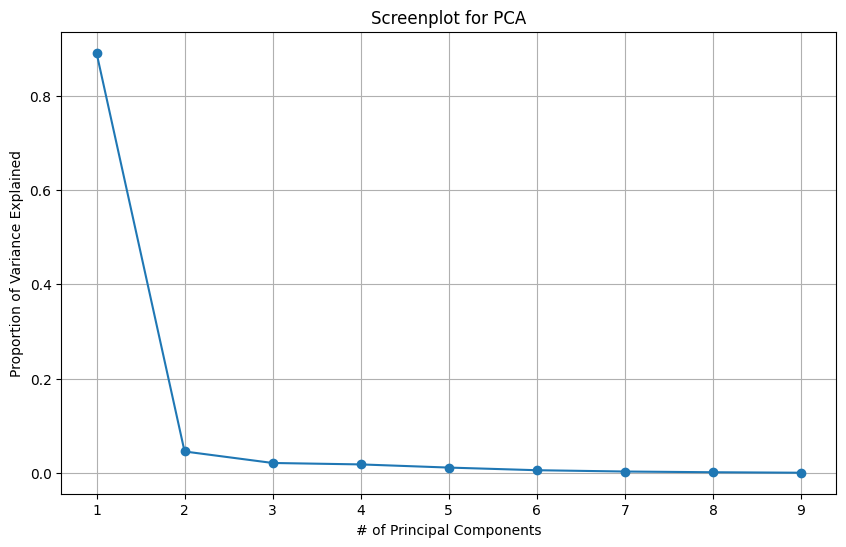

,Principal Component,Percent of Variance Explained,Cumulative Percent
0,1,0.891016,0.891016
1,2,0.045767,0.936783
2,3,0.021395,0.958178
3,4,0.018353,0.976532
4,5,0.011650,0.988182
5,6,0.006047,0.994228
6,7,0.003287,0.997515
7,8,0.001748,0.999263
8,9,0.000737,1.000000


In [89]:
# Applying PCA
pca = PCA()
pca_data = pca.fit_transform(no_outliers_df)

explained_variance = pca.explained_variance_ratio_  # Variance explained by each principal component

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker = 'o', linestyle='-')
plt.title('Screenplot for PCA')
plt.xlabel('# of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.grid(True)
plt.show()

# principal component explained variance dataframe
explained_variance_df = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance) + 1),
    'Percent of Variance Explained': explained_variance,
    'Cumulative Percent': np.cumsum(explained_variance)})
explained_variance_df

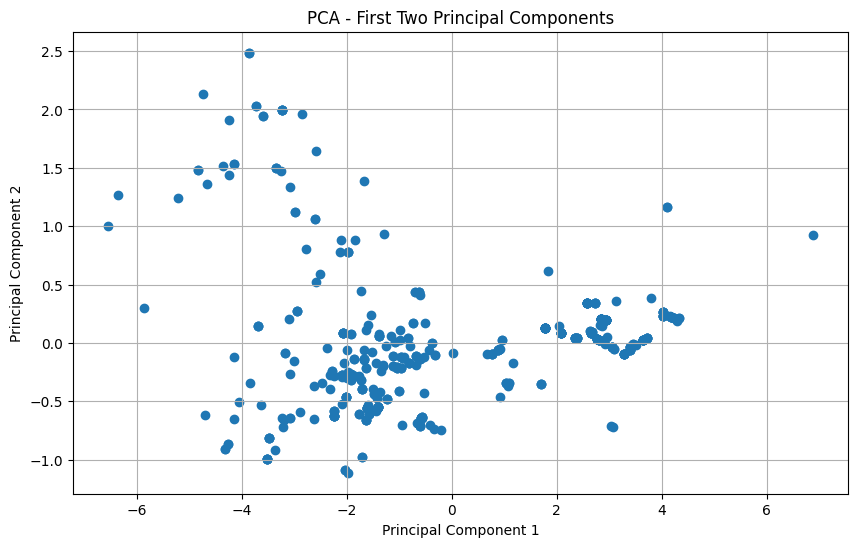

In [90]:
# Visualizing the data in the reduced dimensional space (first two principal components)
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### **Dimensionality Reduction with t-SNE**

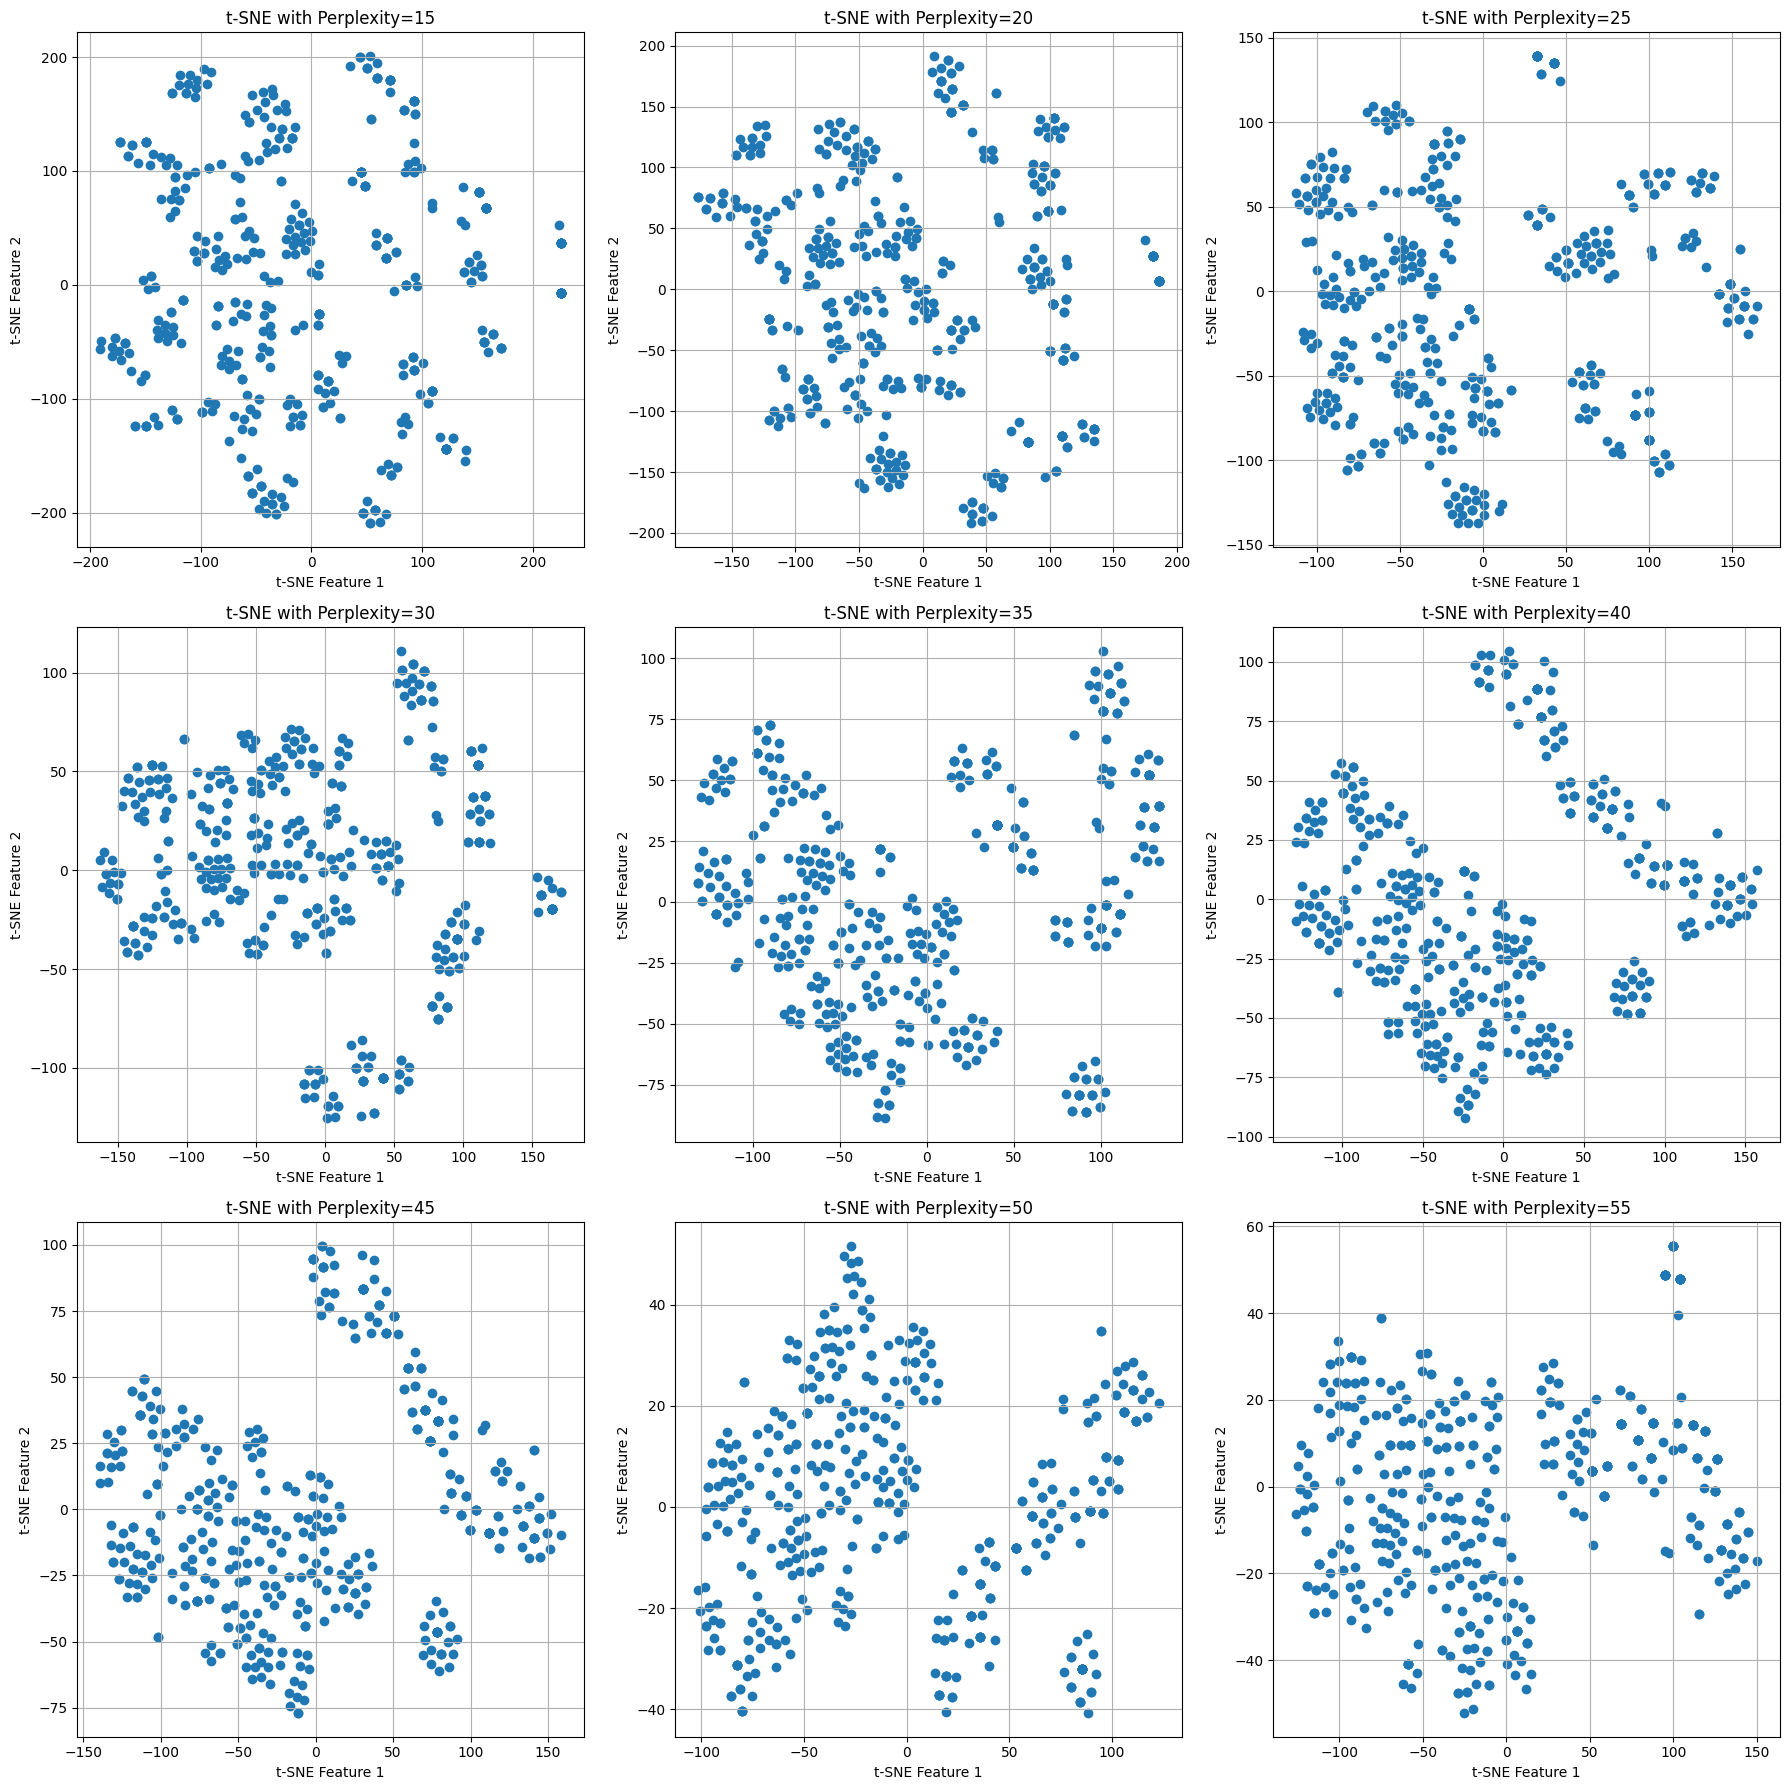

In [96]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Applying t-SNE with different perplexity values
perplexities = [15, 20, 25, 30, 35, 40, 45, 50, 55]
tsne_results = {}

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    tsne_results[perplexity] = tsne.fit_transform(no_outliers_df)

# Plotting 
plt.figure(figsize=(18, 18))
for i, perplexity in enumerate(perplexities):
    plt.subplot(3, 3, i+1)
    plt.scatter(tsne_results[perplexity][:, 0], tsne_results[perplexity][:, 1])
    plt.title(f't-SNE with Perplexity={perplexity}')
    plt.xlabel('t-SNE Feature 1')
    plt.ylabel('t-SNE Feature 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

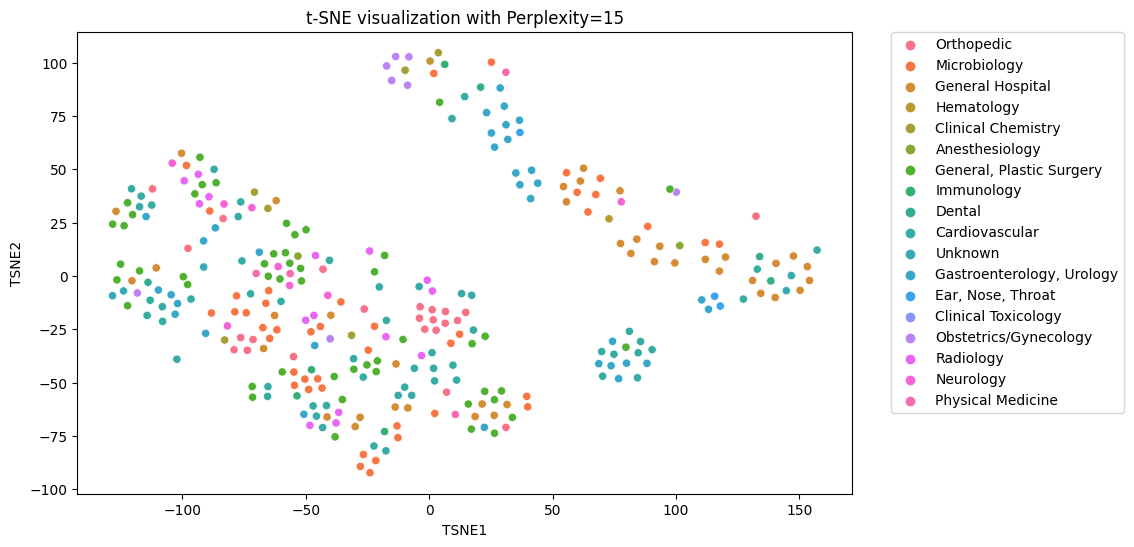

In [102]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=40, random_state=0)
tsne_results = tsne.fit_transform(no_outliers_df)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['advisory_committee_description'] = df['advisory_committee_description']

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='advisory_committee_description', data=tsne_df)
plt.title('t-SNE visualization with Perplexity=40')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


## **Project Report**

#### Overview
In my project, I delved into the complex interplay between the financial structuring of companies and their medical device approval outcomes using a joint SEC-FDA dataset. My goal was to distill continuous quantitative features into a more intuitive and manageable format, leveraging dimensionality reduction techniques.

#### PCA Analysis and Insights
My application of Principal Component Analysis (PCA) revealed striking patterns. The first principal component alone encapsulated 89.10% of the variance. This dominant component, possibly reflecting a composite financial indicator, underscores a pivotal underlying factor in the dataset. The cumulative variance explained by the first 3 components reached a remarkable 95.8178%, indicating that these components succinctly capture the essence of the dataset, meaning that 2 principal components (93.6783%, and also the elbow point) is the optimal number to visualize groups of the feature subspace.

#### t-SNE Analysis and Limitations
The t-SNE analysis, however, presented a different scenario. When attempting to map the advisory committees to clusters, the results were not conclusive. This suggests that the relationship between committee types and the high-dimensional data structure might be more complex than initially hypothesized, or perhaps less linear in nature. The inability of t-SNE to distinctly cluster data based on advisory committees implies that other, non-linear methods might be better suited for uncovering these relationships.

#### Role of Specific Financial Variables
The role of specific financial variables, such as R&D expenditure, emerged as a point of interest for me. It might hold more weight in models that directly predict the likelihood of device approvals. In a regression model, decision tree, or random forest, the direct financial inputs like R&D spending could be more influential. This is based on the premise that R&D intensity is likely a direct contributor to the innovation pipeline and, by extension, to the number and success of device approvals. I will continue to explore this hypothesis in the next phase of my project. 

#### Conclusion and Future Directions
The PCA results provided a comprehensive overview, while the t-SNE analysis highlighted the complexity of mapping non-linear relationships. Moving forward, I plan to focus on the specific financial variables that likely have a more direct impact on FDA approval outcomes. By integrating these variables into random forest models, I aim to uncover how financial structuring influences the rate and success of device approvals. Further, exploring non-linear modeling techniques to better understand the role of advisory committees could provide additional insights into the FDA approval process.